In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re

# import grakel as gk


sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph/myKernels')
from myKernels import RandomWalk as rw
#from importlib import reload
#reload(readfoldertopanda)
import mmdutils
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
import MMDforGraphs as mg
importlib.reload(sys.modules['MMDforGraphs'])
import WL

In [51]:
n1 = 40
nnode1 = 100
k1 = 2.1

n2 = 40
nnode2 = 100
k2 = 2.2


#g1 = mg.ScaleFreeGraph(n1, nnode1, k1)
# g1 = mg.BinomialGraphs(n1, nnode1, k1)
# g2 = mg.ScaleFreeGraph(n2, nnode2, k2)
# g2 = mg.BinomialGraphs(n2, nnode2, k2)

In [54]:
q = np.ones((n1+n2, nnode1))
rejection = np.array([0, 0,0 ])
for _ in range(300):
    if _%10 == 0:
        print(_)

    g1.Generate()
    g2.Generate()
    Gs = g1.Gs + g2.Gs


    rw_kernel = rw.RandomWalk(Gs, c = 0.001, normalize=0, q = q)
    K = rw_kernel.fit_ARKU_plus(r = 12, normalize_adj=False,verbose=False)
    K1 = rw_kernel.fit_random_walk(mu_vec=[0, 1.0], k = 1, r = 12, normalize_adj=False,verbose=False )
    K2 = rw_kernel.fit_random_walk(mu_vec=[0, 1.0, 1], k = 2, r = 12, normalize_adj=False,verbose=False )

    MMD_functions = [mg.MMD_b, mg.MMD_u]

    # initialize bootstrap class, we only want this to be initalized once so that numba njit
    # only gets compiled once (at first call)
    kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
    kernel_hypothesis1 = mg.BoostrapMethods(MMD_functions)
    kernel_hypothesis2 = mg.BoostrapMethods(MMD_functions)
    function_arguments=[dict(n = g1.n, m = g2.n ), dict(n = g1.n, m = g2.n )]
    kernel_hypothesis.Bootstrap(K, function_arguments, B = 3000)
    kernel_hypothesis1.Bootstrap(K1, function_arguments, B = 3000)
    kernel_hypothesis2.Bootstrap(K2, function_arguments, B = 3000)


    #print(f'p_value {kernel_hypothesis.p_values}')
    #print(f'p_value {kernel_hypothesis1.p_values}')
    #print(f'p_value {kernel_hypothesis2.p_values}')
    # print("/////////////////")

    rejection[0] += 1* (kernel_hypothesis.p_values['MMD_u'] <0.025)
    rejection[1] += 1* (kernel_hypothesis1.p_values['MMD_u'] <0.025)
    rejection[2] += 1* (kernel_hypothesis2.p_values['MMD_u'] <0.025)
    # print(f"MMD_u {kernel_hypothesis.sample_test_statistic['MMD_u']}")

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [53]:
rejection

array([48, 50, 47])

In [34]:
rejection

array([3, 2, 2])

<AxesSubplot:>

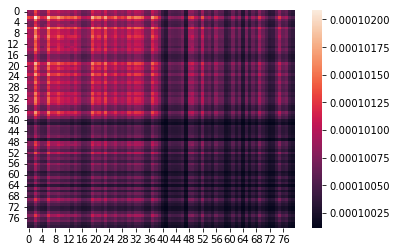

In [18]:
sns.heatmap(K)